In [1]:
# Importanción de librerías utilizadas en el desarrollo del proyecto.

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn import metrics

### Fase 1: Importación y análisis inicial del DataSet

In [2]:
# Importanción del DataSet.

shots = pd.read_csv('shot_logs.csv')

In [3]:
# Visualización del DataSet

shots.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [4]:
# Visualización de los nombres de las columnas para su análisis

shots.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [5]:
# Visualización de los tipos de valores importados

shots.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [6]:
# Visualización de los elementos catalogados como FGM. Estos elementos son los que nos proporcionan la información de si un tiro ha entrado o no siendo el 0 como lanzamiento no exitoso y 1 como lanzamiento exitoso

shots['FGM'].value_counts()

0    70164
1    57905
Name: FGM, dtype: int64

In [7]:
# Visualización de tabla de correlación entre variables

corr = shots.corr()
corr

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
GAME_ID,1.000000,0.001726,0.008129,-0.008921,0.014530,0.002014,-0.000735,-0.000187,0.003418,0.028676,0.006739,-0.008761,-0.008464,0.027937
FINAL_MARGIN,0.001726,1.000000,0.000836,-0.003078,-0.009276,0.011739,0.010788,0.008876,0.024134,0.057165,0.033064,0.058762,0.064784,-0.050825
SHOT_NUMBER,0.008129,0.000836,1.000000,0.654932,-0.032683,0.141100,0.144071,0.011541,0.003054,0.013257,-0.037769,-0.008351,-0.009666,-0.006592
PERIOD,-0.008921,-0.003078,0.654932,1.000000,-0.051796,0.055301,0.046089,0.030080,0.048915,0.011462,-0.010204,-0.014082,-0.008501,0.004790
SHOT_CLOCK,0.014530,-0.009276,-0.032683,-0.051796,1.000000,-0.082771,-0.147688,-0.173026,-0.032809,-0.003289,0.026558,0.096855,0.084173,0.038315
DRIBBLES,0.002014,0.011739,0.141100,0.055301,-0.082771,1.000000,0.914311,-0.082540,-0.169016,0.016915,-0.153674,-0.034390,-0.055689,0.023655
TOUCH_TIME,-0.000735,0.010788,0.144071,0.046089,-0.147688,0.914311,1.000000,-0.085165,-0.181007,0.016225,-0.164737,-0.045299,-0.066736,0.001797
SHOT_DIST,-0.000187,0.008876,0.011541,0.030080,-0.173026,-0.082540,-0.085165,1.000000,0.740933,0.002777,0.523192,-0.191704,-0.069147,-0.024270
PTS_TYPE,0.003418,0.024134,0.003054,0.048915,-0.032809,-0.169016,-0.181007,0.740933,1.000000,0.006266,0.414198,-0.121293,0.030361,0.010486
CLOSEST_DEFENDER_PLAYER_ID,0.028676,0.057165,0.013257,0.011462,-0.003289,0.016915,0.016225,0.002777,0.006266,1.000000,-0.015057,-0.002633,-0.002046,-0.002317


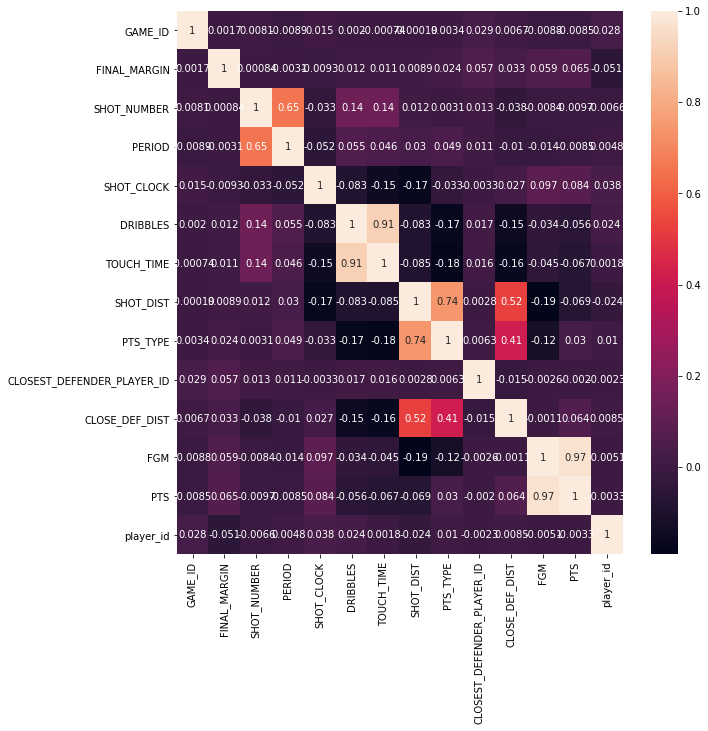

In [8]:
# Visualización de gráfica de correlación

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr, annot=True)

### Fase 2: Preparación del DataSet

In [9]:
# Quitamos las columna pts_type ya que en tiene un grado alto de correlación con shots_distance. De hecho esto es así ya que a partir de una distancia el tiro vale 3 en vez de 2 puntos
# Eliminamos las columnas con información repetida. SHOT RESULT nos proporciona la misma información que FMG y por tanto no la necesitaremos para nuestro análisis. Asimismo PTS por porciona la misma información cuando se cruza con shot distance
# Eliminamos también las columnas que no serán de relevancia para el análisis (GAMEID, MATCHUP, FINAL MARGIN, CLOSEST DEFENDER, Player_name o SHOT_NUMBER)
# Las columnas CLOSEST_DEFENDER_PLAYER_ID o player_id podrían ser de relevancia pero se deciden quitar para eliminar complejidad en el ánalisis

shots = shots.drop(columns=['PTS_TYPE',  'SHOT_RESULT', 'PTS', 'GAME_ID', 'MATCHUP', 'FINAL_MARGIN', 
                            'CLOSEST_DEFENDER', 'player_name', 'SHOT_NUMBER', 'CLOSEST_DEFENDER_PLAYER_ID', 
                            'player_id'])

In [10]:
# Visualizamos el DataSet ya con estas columnas eliminadas

shots.head()

,LOCATION,W,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,FGM
0,A,W,1,1:09,10.8,2,1.9,7.7,1.3,1
1,A,W,1,0:14,3.4,0,0.8,28.2,6.1,0
2,A,W,1,0:00,NaN,3,2.7,10.1,0.9,0
3,A,W,2,11:47,10.3,2,1.9,17.2,3.4,0
4,A,W,2,10:34,10.9,2,2.7,3.7,1.1,0


In [11]:
# Comprobamos los tipos y valores que tenemos de cada columna

shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 10 columns):
LOCATION          128069 non-null object
W                 128069 non-null object
PERIOD            128069 non-null int64
GAME_CLOCK        128069 non-null object
SHOT_CLOCK        122502 non-null float64
DRIBBLES          128069 non-null int64
TOUCH_TIME        128069 non-null float64
SHOT_DIST         128069 non-null float64
CLOSE_DEF_DIST    128069 non-null float64
FGM               128069 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 9.8+ MB


In [12]:
# Comprobamos la cantidad de valores nulos que obtenemos

shots.isnull().sum()

LOCATION             0
W                    0
PERIOD               0
GAME_CLOCK           0
SHOT_CLOCK        5567
DRIBBLES             0
TOUCH_TIME           0
SHOT_DIST            0
CLOSE_DEF_DIST       0
FGM                  0
dtype: int64

In [13]:
# Vemos que los únicos valores nulos que encontramos son referentes a Shot_clock, al ser estos un menos de un 5% de los valores y ser una esta columna de especial relevancia eliminamos estas filas que tienen valores nulos en vez de transformarlas a valor cero

shots.dropna (inplace = True)

In [14]:
# Vemos la tipologia de las columnas de cara a seguir limpiando el DataSet

shots.dtypes

LOCATION           object
W                  object
PERIOD              int64
GAME_CLOCK         object
SHOT_CLOCK        float64
DRIBBLES            int64
TOUCH_TIME        float64
SHOT_DIST         float64
CLOSE_DEF_DIST    float64
FGM                 int64
dtype: object

In [15]:
# Transformamos la columna GAME_CLOCK a valor numerico para poder realizar nuestro ánalisis a partir de una función 

def arrange(time):
    ## A esta función le entra como valor la columna de SHOT_CLOCK 
    a= time.split(':')
    return int(a[0])
    # Devuelve el minuto del partio en valor numerico
    
shots.GAME_CLOCK = shots.GAME_CLOCK.apply(arrange)

In [16]:
# Comprobamos de todos nuestros valores cuantos se corresponden a los minutos finales de cuarto/partido y cuantos al tiempo normal del mismo

shots['GAME_CLOCK'].value_counts()

9     10612
4     10612
7     10605
6     10601
8     10545
5     10480
3     10461
10    10446
1     10271
2     10191
11     8871
0      8804
12        3
Name: GAME_CLOCK, dtype: int64

In [17]:
# Creación del DataFrame con dummies en valores del tipo no numerico

shots_dummy = pd.get_dummies(shots, drop_first=True)
shots_dummy.head(10)

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,FGM,LOCATION_H,W_W
0,1,1,10.8,2,1.9,7.7,1.3,1,0,1
1,1,0,3.4,0,0.8,28.2,6.1,0,0,1
3,2,11,10.3,2,1.9,17.2,3.4,0,0,1
4,2,10,10.9,2,2.7,3.7,1.1,0,0,1
5,2,8,9.1,2,4.4,18.4,2.6,0,0,1
6,4,10,14.5,11,9.0,20.7,6.1,0,0,1
7,4,8,3.4,3,2.5,3.5,2.1,1,0,1
8,4,5,12.4,0,0.8,24.6,7.3,0,0,1
9,2,11,17.4,0,1.1,22.4,19.8,0,1,1
10,2,6,16.0,8,7.5,24.5,4.7,0,1,1


In [18]:
# Comprobación del los tipos del DataSet

shots_dummy.dtypes

PERIOD              int64
GAME_CLOCK          int64
SHOT_CLOCK        float64
DRIBBLES            int64
TOUCH_TIME        float64
SHOT_DIST         float64
CLOSE_DEF_DIST    float64
FGM                 int64
LOCATION_H          uint8
W_W                 uint8
dtype: object

## Fase 3: Entrenamiento de los modelos y obtención de métricas

### Modelo 1: Logistic regresion

In [19]:
# La columna FGM será nuestro groundtruth, utilizando el resto de valores como features para tratar de predecir el valor de FGM.

X = shots_dummy.drop(columns='FGM')
y = shots_dummy['FGM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(98001, 9) (24501, 9) (98001,) (24501,)


In [20]:
cls = LogisticRegression()

In [21]:
cls.fit(X_train, y_train)
cls.score(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6054513395699662

In [22]:
y_pred_logistic = [int(cls.predict([X_test.iloc[i]])) for i in range(len(y_test))]

In [23]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
as_logistic = accuracy_score(y_test, y_pred_logistic)
print(cm_logistic)
print(as_logistic)

[[9634 3790]
 [5780 5297]]
0.6094036978082528


In [24]:

# Plot non-normalized confusion matrix logist
#plot_confusion_matrix(y_test, y_pred2, classes=class_names,
#title='Confusion matrix, without normalization')

# Plot normalized confusion matrix logist
#plot_confusion_matrix(y_test, y_pred2, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')


### Modelo 2: K-Nearest Neighbors

- **2.1 k=3**

In [25]:
# k=3

cls2 = KNeighborsClassifier(n_neighbors=3)
cls2.fit(X_train, y_train)
cls2.score(X, y)
y_pred_kneighbors_3 = [int(cls2.predict([X_test.iloc[i]])) for i in range(len(y_test))]
cm_kneighbors_3 = confusion_matrix(y_test, y_pred_kneighbors_3)
as_kneighbors_3 = accuracy_score(y_test, y_pred_kneighbors_3)
print(cm_kneighbors_3)
print(as_kneighbors_3)

[[8050 5374]
 [5670 5407]]
0.5492428880453859


- **2.2 k=5**

In [26]:
# k=20

cls3 = KNeighborsClassifier(n_neighbors=5)
cls3.fit(X_train, y_train)
cls3.score(X, y)
y_pred_kneighbors_5 = [int(cls3.predict([X_test.iloc[i]])) for i in range(len(y_test))]
cm_kneighbors_5 = confusion_matrix(y_test, y_pred_kneighbors_5)
as_kneighbors_5 = accuracy_score(y_test, y_pred_kneighbors_5)
print(cm_kneighbors_5)
print(as_kneighbors_5)

[[8407 5017]
 [5790 5287]]
0.5589159626137709


### Modelo 3: RandomForest

In [27]:
clf_RF = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)
RF = clf_RF.score(X_test,y_test)

In [28]:
y_predRF = clf_RF.predict(X_test)
confusion_matrix(y_test, y_predRF)

array([[9903, 3521],
       [6742, 4335]])

In [29]:
RF

0.5811191379943675

### Modelo 4: Support Vector Classification

In [30]:
clf_svc = svm.SVC(gamma ="auto").fit(X_train, y_train)
svc = clf_svc.score(X_test,y_test)

In [31]:
y_predsvc = clf_svc.predict(X_test)
confusion_matrix(y_test, y_predsvc)

array([[10587,  2837],
       [ 6758,  4319]])

In [32]:
svc

0.6083833312926002

### Modelo 5: DecisionTreeClassifier

In [33]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
acc_tree = clf_tree.score(X_test,y_test)

In [34]:
y_predDT = clf_tree.predict(X_test)
confusion_matrix(y_test, y_predDT)

array([[7667, 5757],
       [5535, 5542]])

In [35]:
acc_tree

0.5391208522101139